import

In [7]:
import pyswarms as ps
import matplotlib.pyplot as plt
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history
import numpy as np
import math

funkcja

In [26]:
def endurance(params):
    [x, y, z, v, u, w] = params
    return -1 * math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)

zadanie1

In [27]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# wprowadzamy ograniczenia
x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6,
                                    options=options, bounds=my_bounds)
optimizer.optimize(f, iters=1000)

2022-04-06 11:24:02,167 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-.43
2022-04-06 11:24:03,988 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.42976912013523727, best pos: [0.45381396 0.4496141  0.05086105 0.98675092 0.01274199 0.97806268]


(-0.42976912013523727,
 array([0.45381396, 0.4496141 , 0.05086105, 0.98675092, 0.01274199,
        0.97806268]))

zadanie 2

In [31]:
def fitness_func(solution):
    sum1 = np.sum(solution * S)
    solution_invert = 1 - solution
    sum2 = np.sum(solution_invert * S)
    fitness = np.abs(sum1-sum2)
    return fitness

def f2(x):
    n_particles = x.shape[0]
    j = [fitness_func(x[i]) for i in range(n_particles)]
    return np.array(j)

2022-04-06 11:41:57,026 - pyswarms.discrete.binary - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 1}
pyswarms.discrete.binary: 100%|██████████|30/30, best_cost=4
2022-04-06 11:41:57,098 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 4.0, best pos: [1 1 1 1 1 1 0 0 1 1 0 1 0 0 1]


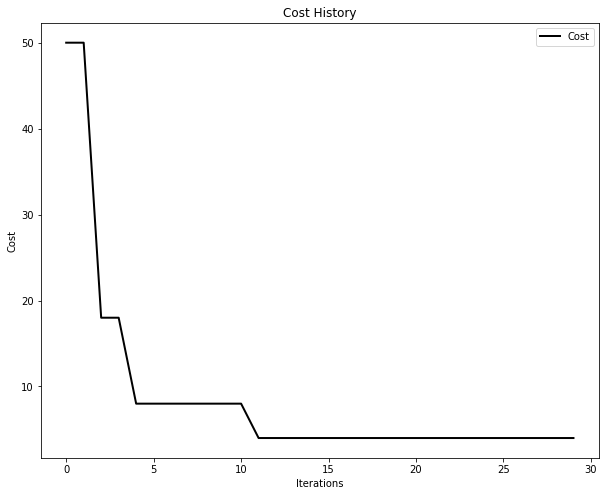

In [33]:
S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k':2, 'p':1}

optimizer = ps.discrete.BinaryPSO(n_particles=10, dimensions=15,
                                  options=options)
optimizer.optimize(f2, iters=30, verbose=True)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()